In [12]:
import os
import json
import pickle
import collections
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pickle

import torch
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from transformers import BertTokenizer

In [3]:
with open("../../atts/atts.pickle", 'rb') as f:
    atts = pickle.load(f)

In [ ]:
tok = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
keys = list(atts.keys())

In [18]:
att = atts[keys[5]]
v2l = att['v2l']
input_id = att['input_id']
img_id = att['img_id']
v2l = v2l[:10, 1:len(input_id)]
print(l2v.shape)
print(img_id)

(10, 16)
n44249


In [19]:
tok.convert_ids_to_tokens(input_id)

['is',
 'the',
 'heavy',
 'person',
 'to',
 'the',
 'right',
 'or',
 'to',
 'the',
 'left',
 'of',
 'the',
 'woman',
 '?']

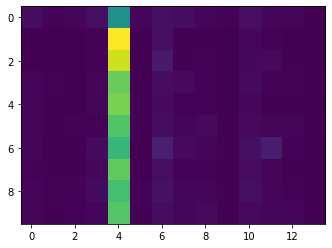

In [21]:
fig, ax = plt.subplots()
ax.imshow(v2l)

In [ ]:
# box functions
def xywh_to_xyxy(boxes):
    """Convert [x y w h] box format to [x1 y1 x2 y2] format."""
    return np.hstack((boxes[:, 0:2], boxes[:, 0:2] + boxes[:, 2:4] - 1))

def show_attn(img_path, box, attn):
    """
    box : [xywh]
    attn: 49
    """
    img = imread(img_path)
    attn = np.array(attn).reshape(7,7)
    x,y,w,h = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    roi = img[y:y+h-1, x:x+w-1]
    attn = imresize(attn, [h,w])
    plt.imshow(roi)
    plt.imshow(attn, alpha=0.7)
    
def show_boxes(img_path, boxes, colors, texts=None, masks=None):
    # boxes [[xyxy]]
    img = imread(img_path)
    plt.imshow(img)
    ax = plt.gca()
    for k in range(boxes.shape[0]):
        box = boxes[k]
        xmin, ymin, xmax, ymax = list(box)
        coords = (xmin, ymin), xmax - xmin + 1, ymax - ymin + 1
        color = colors[k]
        ax.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        if texts is not None:
            ax.text(xmin, ymin, texts[k], bbox={'facecolor':color, 'alpha':0.5})
    # show mask
    if masks is not None:
        for k in range(len(masks)):
            mask = masks[k]
            m = np.zeros( (mask.shape[0], mask.shape[1], 3))
            m[:,:,0] = 0; m[:,:,1] = 0; m[:,:,2] = 1.
            ax.imshow(np.dstack([m*255, mask*255*0.4]).astype(np.uint8))